In [ ]:

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
Image_size=256
Batch_size=1
channels=3
epochs=10

In [ ]:
datasets=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/cats_dogs"
,shuffle=True,image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 152 files belonging to 2 classes.


In [ ]:
len(datasets)
class_names=datasets.class_names

In [ ]:
for image_batch, label_batch in datasets.take(1):
    for i in range(5):
        print(label_batch[0])
        print(class_names[label_batch[0]])

tf.Tensor(0, shape=(), dtype=int32)
cats
tf.Tensor(0, shape=(), dtype=int32)
cats
tf.Tensor(0, shape=(), dtype=int32)
cats
tf.Tensor(0, shape=(), dtype=int32)
cats
tf.Tensor(0, shape=(), dtype=int32)
cats


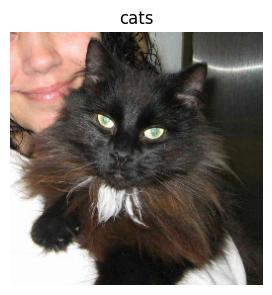

In [ ]:
plt.figure(figsize=(15,15))

for image_batch, label_batch in datasets.take(1):
    ax = plt.subplot(3,4, i+1)
    plt.title(class_names[label_batch[0]])
    plt.imshow(np.uint8(image_batch[0]))
    plt.axis("off")



In [ ]:
len(datasets)

152

In [ ]:
train_size=0.8
len(datasets)*.8

121.60000000000001

In [ ]:
train_ds=datasets.take(121)
test_ds=datasets.take(10)
val_ds=datasets.take(10)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(Image_size,Image_size),
     layers.experimental.preprocessing.Rescaling(1.0/255) ])

In [ ]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2) ])

building model

In [ ]:
input_shape=(Batch_size,Image_size,Image_size,channels)
n_classes=2
model=models.Sequential([resize_rescale,data_augmentation,
layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),
layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape),
layers.MaxPooling2D((2,2)),

layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(n_classes,activation='softmax'),
                         ])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (1, 256, 256, 3)          0         
                                                                 
 sequential_1 (Sequential)   (1, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (1, 254, 254, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2  (1, 127, 127, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (1, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (1, 62, 62, 64)           0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Traning model

In [ ]:
history=model.fit(
    train_ds,
    epochs=epochs,
    batch_size= Batch_size,

    verbose=1,
    validation_data=val_ds
)

Epoch 1/10
121/121 [==============================] - 24s 9ms/step - loss: 0.6964 - accuracy: 0.5041 - val_loss: 0.6780 - val_accuracy: 0.7000
Epoch 2/10
121/121 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5455 - val_loss: 0.6811 - val_accuracy: 0.7000
Epoch 3/10
121/121 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.5455 - val_loss: 0.6655 - val_accuracy: 0.7000
Epoch 4/10
121/121 [==============================] - 1s 10ms/step - loss: 0.6925 - accuracy: 0.5455 - val_loss: 0.6686 - val_accuracy: 0.7000
Epoch 5/10
121/121 [==============================] - 1s 8ms/step - loss: 0.6910 - accuracy: 0.5455 - val_loss: 0.6691 - val_accuracy: 0.7000
Epoch 6/10
121/121 [==============================] - 1s 7ms/step - loss: 0.6906 - accuracy: 0.5455 - val_loss: 0.6638 - val_accuracy: 0.7000
Epoch 7/10
121/121 [==============================] - 1s 7ms/step - loss: 0.6915 - accuracy: 0.5455 - val_loss: 0.6659 - val_accuracy: 0.7000
Epoc

In [ ]:
score=model.evaluate(test_ds)

10/10 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7000


First image to predict
actual label:  cats
1/1 [==============================] - 0s 191ms/step
predicted label: cats


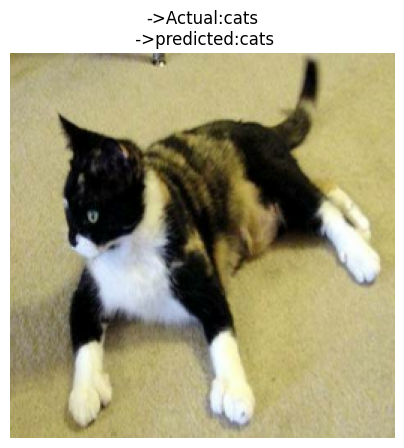

In [ ]:
import numpy as np
plt.figure(figsize=(5,5))

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label: ", class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])
    actual_class=class_names[labels_batch[0]]
    predicted_class=class_names[np.argmax(batch_prediction[0])]
    plt.title(f"->Actual:{actual_class}\n ->predicted:{predicted_class}")


    plt.axis("off")

In [ ]:
!pip install fastapi
!pip install uvicorn
